In [1]:
import numpy as np
import awkward as ak
import uproot

import hist
from topcoffea.modules.histEFT import HistEFT
import topcoffea.modules.utils as utils

import mplhep as hep
import matplotlib.pyplot as plt
import os

In [2]:
hep.style.use("CMS")
params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
          'legend.fontsize':20, 
          'lines.markersize':5}
plt.rcParams.update(params)

In [3]:
wc_lst = utils.get_list_of_wc_names("/cms/cephfs/data/store/user/hnelson2/mc/NanoGen/tW_stpt_tests/NanoGen_tW_orig/nanoGen_402.root")
print(wc_lst)

['cHtbRe', 'ctGRe', 'ctGIm', 'cHQ3', 'cbWRe', 'cQl3', 'cleQt3Re', 'ctWRe', 'cleQt1Re']


# Event Weight Plots

In [5]:
new1_eventweights=utils.get_hist_from_pkl("../tW_new1_eventweights.pkl.gz", allow_empty=False)
new2_eventweights=utils.get_hist_from_pkl("../tW_new2_eventweights.pkl.gz", allow_empty=False)
yukawa_eventweights=utils.get_hist_from_pkl("../tW_yukawa_eventweights.pkl.gz", allow_empty=False)

In [5]:
# hists_orig = utils.get_hist_from_pkl("../tW_orig_eventweights.pkl.gz", allow_empty=False)
# hists_small = utils.get_hist_from_pkl("../tW_small_eventweights.pkl.gz", allow_empty=False)
# hists_medium = utils.get_hist_from_pkl("../tW_medium_eventweights.pkl.gz", allow_empty=False)
# hists_large = utils.get_hist_from_pkl("../tW_large_eventweights.pkl.gz", allow_empty=False)
# outpath = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/event_weights/"

In [43]:
outpath = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April29/"

fig, ax = plt.subplots()
new1_eventweights["weights_SM_log"].plot1d(ax=ax, stack=False, yerr=False, label="SM rwgt")
# yukawa_eventweights["weights_pt1_log"].plot1d(ax=ax, stack=False, yerr=False, label="rwgt 1")
# yukawa_eventweights["weights_pt2_log"].plot1d(ax=ax, stack=False, yerr=False, label="rwgt 2")
# yukawa_eventweights["weights_pt3_log"].plot1d(ax=ax, stack=False, yerr=False, label="rwgt 3")
# yukawa_eventweights["weights_pt4_log"].plot1d(ax=ax, stack=False, yerr=False, label="rwgt 4")

ax.set_xlabel("log(event weight)")
ax.set_ylabel("Events")
ax.set_xlim([-4,0])
ax.legend(loc='upper right')      

outname = os.path.join(outpath, f"event_weights_SM.png")
fig.savefig(outname)
print(f'plot saved to {outname}')
plt.close(fig)

plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April29/event_weights_SM.png


In [77]:
# for h in new1_eventweights: 
#     fig, ax = plt.subplots()
#     new1_eventweights[h].plot1d(ax=ax, stack=False, yerr=False, label="tW_new1")
#     new2_eventweights[h].plot1d(ax=ax, stack=False, yerr=False, label="tW_new2")
#     ax.legend(loc='upper right')
#     ax.set_xlim([-4, 1])
#     outname = os.path.join(outpath, f"{h}.pdf")
#     fig.savefig(outname)
#     print(f'plot saved to {outname}')

# Kinematic Plots with Uncertainties

In [6]:
'''
Checking that the old histogram normalized with density=True and the new histograms 
manually normalized to 1.0 to check that they are identical, both in bin content and also the uncertainties. 
'''

tWtop_powheg_kin = utils.get_hist_from_pkl("../tWtop_powheg_hist.pkl.gz", allow_empty=False)
tWantitop_powheg_kin = utils.get_hist_from_pkl("../tWantitop_powheg_hist.pkl.gz", allow_empty=False)
new1_kin = utils.get_hist_from_pkl("../tW_new1_kin.pkl.gz", allow_empty=False)

tWtop = utils.get_hist_from_pkl("../tWtop_powheg_hist_norm.pkl.gz", allow_empty=False)
tWantitop = utils.get_hist_from_pkl("../tWantitop_powheg_hist_norm.pkl.gz", allow_empty=False)
new1 = utils.get_hist_from_pkl("../tW_new1_kin_norm.pkl.gz", allow_empty=False)

name='njets'
old_tWpowheg = tWtop_powheg_kin[name]+tWantitop_powheg_kin[name]
old_eft = new1_kin[name].as_hist({}).integrate('process')

new_tWpowheg = tWtop[name]+tWantitop[name]
new_eft = new1[name]

fig, (ax, rax) = plt.subplots(1, 2, figsize=(16, 8))
hep.histplot(old_tWpowheg, ax=ax, histtype='fill', stack=False, yerr=True, density=True, linewidth=8, label="old_powheg")
hep.histplot(new_tWpowheg, ax=ax, histtype='step', stack=False, yerr=True, label="new_powheg")
hep.histplot(old_eft, ax=rax, histtype='fill', stack=False, yerr=True, density=True, linewidth=8, label="old_eft")
hep.histplot(new_eft, ax=rax, histtype='step', stack=False, yerr=True, label="new_eft")

ax.legend(loc='upper right')
rax.legend(loc='upper right')
fig.show()

TypeError: unsupported operand type(s) for /: 'int' and 'boost_histogram._core.accumulators.WeightedSum'

In [13]:
def get_ratio_uncertainty(num_hist, denom_hist):
    xvals = num_hist.axes.centers[0]
    yvals_num = num_hist.values()
    yvals_denom = denom_hist.values()
    sigma_num = np.sqrt(num_hist.variances())
    sigma_denom = np.sqrt(denom_hist.variances())

    ratio = np.divide(yvals_num, yvals_denom)

    # calculation for error propagation for ratio = yavls_num/yvals_denom
    # generally, z=x/y; sigma_z = abs(z)sqrt((sigma_x/x)^2+(sigma_y/y)^2)
    sigma_y = np.multiply(np.abs(ratio), np.sqrt(np.add(np.square(np.divide(sigma_num, yvals_num)), np.square(np.divide(sigma_denom, yvals_denom)))))

    return sigma_y

def get_ratio_points(hist1, histSM):
    num = hist1.values()
    centers = hist1.axes.centers[0]
    denomSM = histSM.values()
    ratio = np.divide(num, denomSM)

    return centers, ratio

def make_plot_with_ratio(h_num, h_denom, label_num, label_denom, xlabel, title):
    ## get ratios and uncertainties
    centers, ratio = get_ratio_points(h_num, h_denom)
    uncert = get_ratio_uncertainty(h_num, h_denom)

    ## Initialize figure and axes
    # fig, ax = plt.subplots()
    fig, (ax, rax) = plt.subplots(
        nrows=2,
        ncols=1,
        figsize=(10,12),
        gridspec_kw={"height_ratios": (3, 1)},
        sharex=True
    )
    fig.subplots_adjust(hspace=.1)

    ## Plot histograms and ratio plot
    hep.histplot(h_num, ax=ax, stack=False, yerr=True, linewidth=2, label=label_num)
    hep.histplot(h_denom, ax=ax, stack=False, yerr=True, linewidth=2, label=label_denom)
    rax.scatter(centers, ratio)
    rax.errorbar(centers, ratio, xerr = None, yerr = uncert, capsize=5, ls='none')

    ## Formatting
    ax.legend(loc = 'upper right', fontsize = 'small')
    ax.set_ylabel("Events", fontsize='medium')
    ax.set_xlabel("")
    # ax.set_xlim([0, 200])
    rax.set_ylabel("Ratio", fontsize='medium')
    rax.set_xlabel(xlabel, fontsize="medium")
    rax.set_ylim([0, 2])
    rax.axhline(y=1.0, color='gray', linestyle='--')
    # rax.grid(axis='y')
    plt.figtext(0.13, 0.9, title, fontsize='small')

    return fig

In [11]:
## do this when the normalization is just xsec/sow to find what constant is needed to normalize all hists in this sample to 1.0
yukawa = utils.get_hist_from_pkl("../tW_yukawa_kin_norm.pkl.gz", allow_empty=False)
for h in yukawa:
    print(yukawa[h].sum())

WeightedSum(value=1.5217, variance=0.000349329)
WeightedSum(value=1.5217, variance=0.000349329)
WeightedSum(value=1.5217, variance=0.000349329)
WeightedSum(value=1.52094, variance=0.00034917)
WeightedSum(value=1.5217, variance=0.000349329)
WeightedSum(value=1.51741, variance=0.000348134)
WeightedSum(value=1.51939, variance=0.000348845)
WeightedSum(value=1.5217, variance=0.000349329)


plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April29/kinematics_ratios/mt2.png


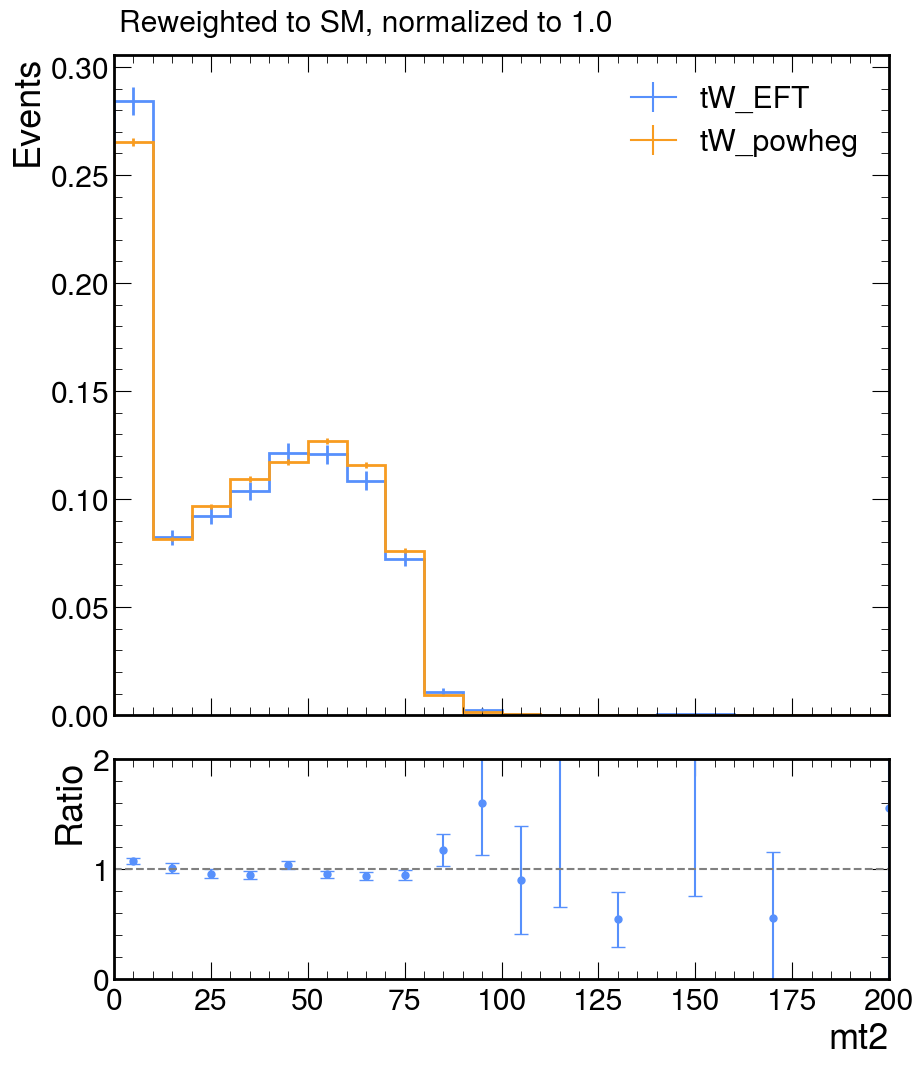

In [66]:
# tWtop = utils.get_hist_from_pkl("../tWtop_powheg_hist_norm.pkl.gz", allow_empty=False)
# tWantitop = utils.get_hist_from_pkl("../tWantitop_powheg_hist_norm.pkl.gz", allow_empty=False)
# new1 = utils.get_hist_from_pkl("../tW_new1_kin_norm.pkl.gz", allow_empty=False)

# outpath = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/kinematics_ratios/"
# for name in tWtop: 
#     hpowheg = tWtop[name]+tWantitop[name]
#     hEFT = new1[name]

#     fig = make_plot_with_ratio(hEFT, hpowheg, "tW_EFT", "tW_powheg", name, "Reweighted to SM, normalized to 1.0")
#     outname = os.path.join(outpath, f"{name}.png")    
#     fig.savefig(outname)
#     print(f'plot saved to {outname}')

tWtop = utils.get_hist_from_pkl("../tWtop_powheg_hist_norm.pkl.gz", allow_empty=False)
tWantitop = utils.get_hist_from_pkl("../tWantitop_powheg_hist_norm.pkl.gz", allow_empty=False)
yukawa = utils.get_hist_from_pkl("../tW_yukawa_kin_norm.pkl.gz", allow_empty=False)

outpath = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April29/kinematics_ratios/"
# for name in tWtop: 
#     hpowheg = tWtop[name]+tWantitop[name]
#     hEFT = yukawa[name]

#     fig = make_plot_with_ratio(hEFT, hpowheg, "tW_EFT", "tW_powheg", name, "Reweighted to SM, normalized to 1.0")
#     outname = os.path.join(outpath, f"{name}.png")    
#     fig.savefig(outname)
#     print(f'plot saved to {outname}')

plot_list = ['mt2']
for name in plot_list:
    hpowheg = tWtop[name]+tWantitop[name]
    hEFT = yukawa[name]
    fig = make_plot_with_ratio(hEFT, hpowheg, "tW_EFT", "tW_powheg", name, "Reweighted to SM, normalized to 1.0")
    outname = os.path.join(outpath, f"{name}.png")    
    fig.savefig(outname)
    print(f'plot saved to {outname}')

/tmp/ipykernel_1844095/2804843445.py:20: RuntimeWarning: invalid value encountered in divide
  ratio = np.divide(num, denomSM)
/tmp/ipykernel_1844095/2804843445.py:8: RuntimeWarning: invalid value encountered in divide
  ratio = np.divide(yvals_num, yvals_denom)
/tmp/ipykernel_1844095/2804843445.py:12: RuntimeWarning: invalid value encountered in divide
  sigma_y = np.multiply(np.abs(ratio), np.sqrt(np.add(np.square(np.divide(sigma_num, yvals_num)), np.square(np.divide(sigma_denom, yvals_denom)))))
/tmp/ipykernel_1844095/2804843445.py:20: RuntimeWarning: invalid value encountered in divide
  ratio = np.divide(num, denomSM)
/tmp/ipykernel_1844095/2804843445.py:8: RuntimeWarning: invalid value encountered in divide
  ratio = np.divide(yvals_num, yvals_denom)
/tmp/ipykernel_1844095/2804843445.py:12: RuntimeWarning: invalid value encountered in divide
  sigma_y = np.multiply(np.abs(ratio), np.sqrt(np.add(np.square(np.divide(sigma_num, yvals_num)), np.square(np.divide(sigma_denom, yvals_den

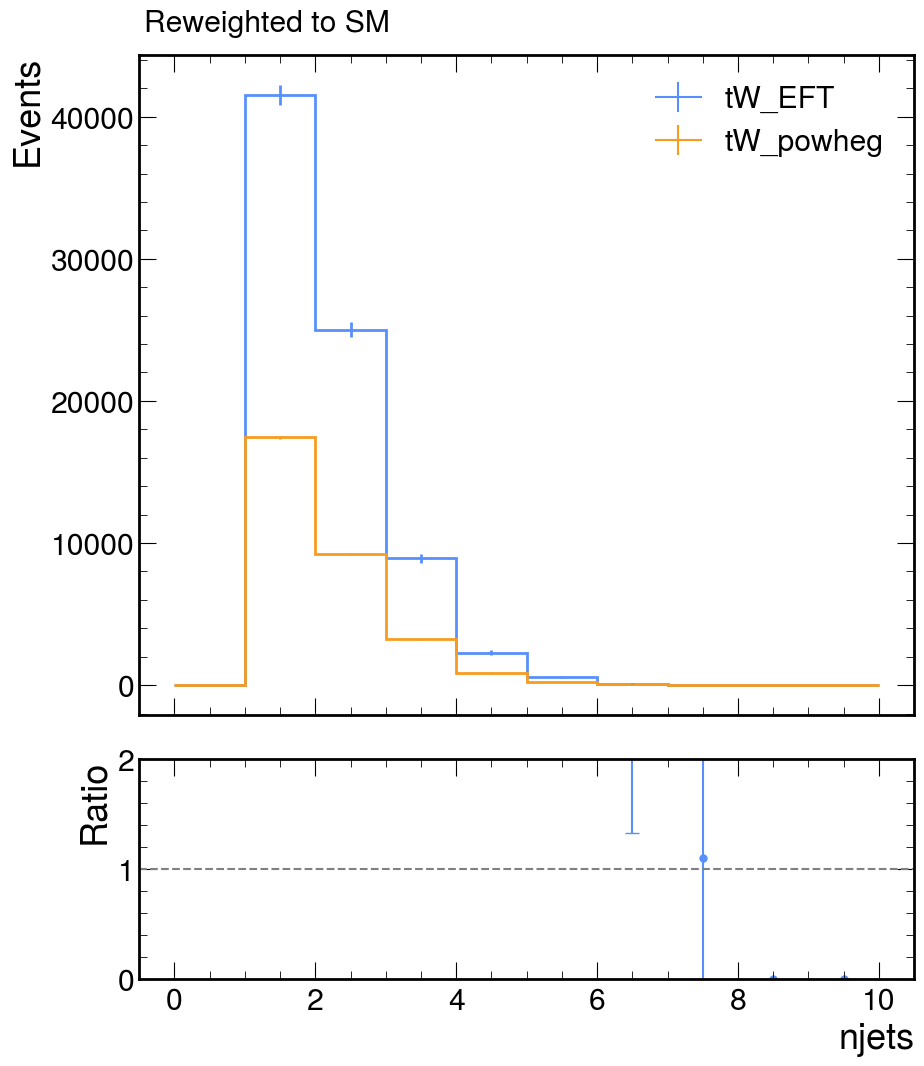

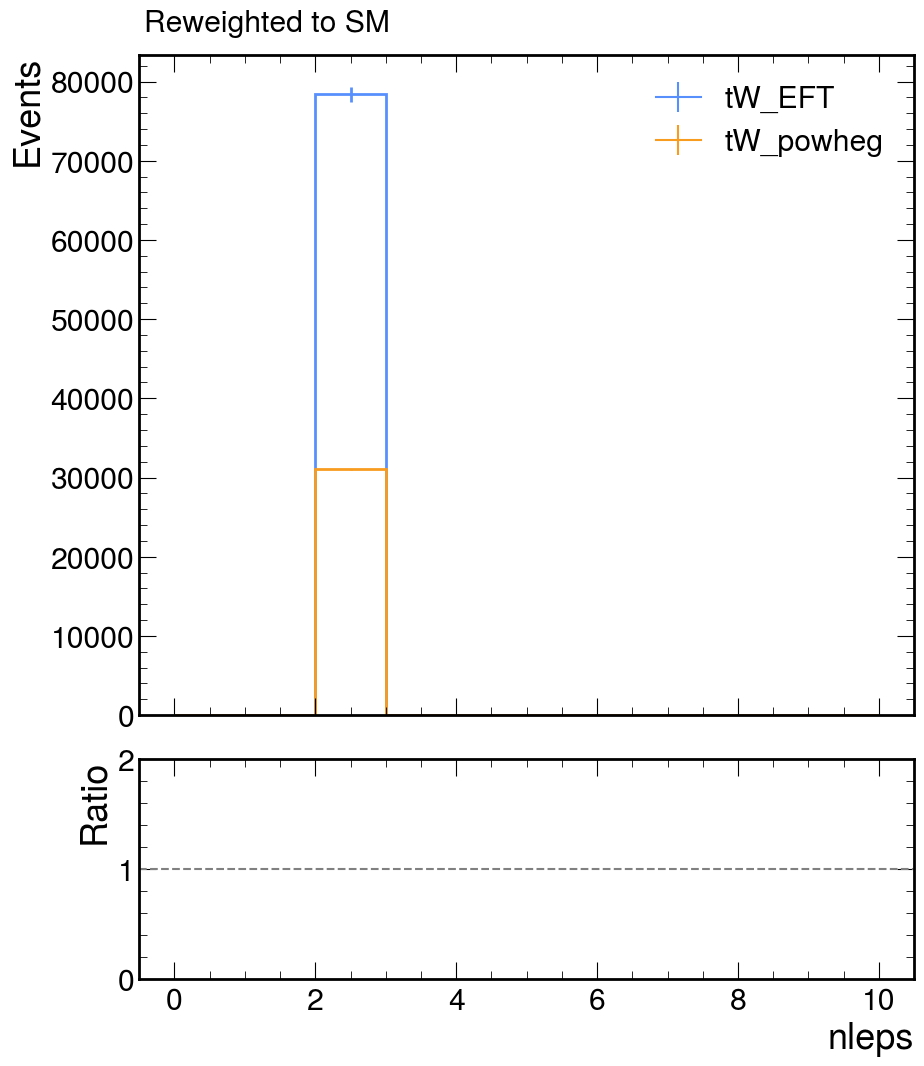

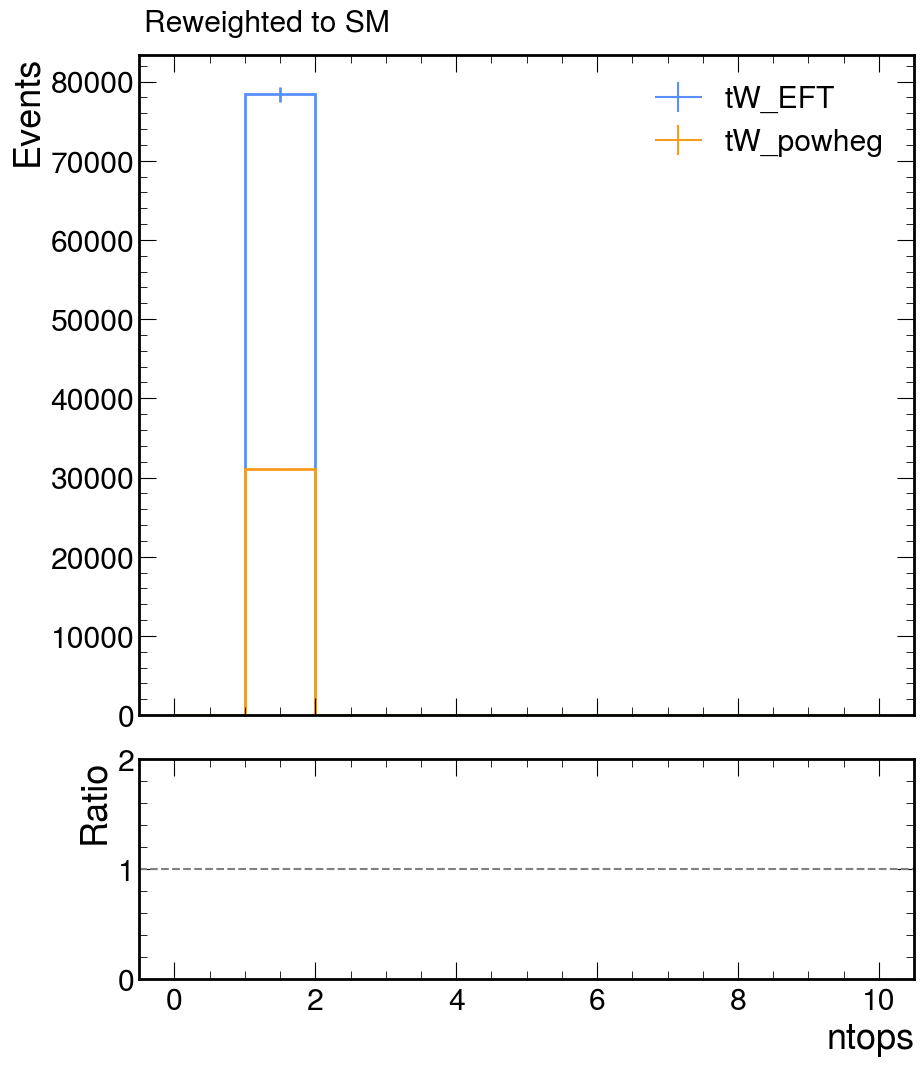

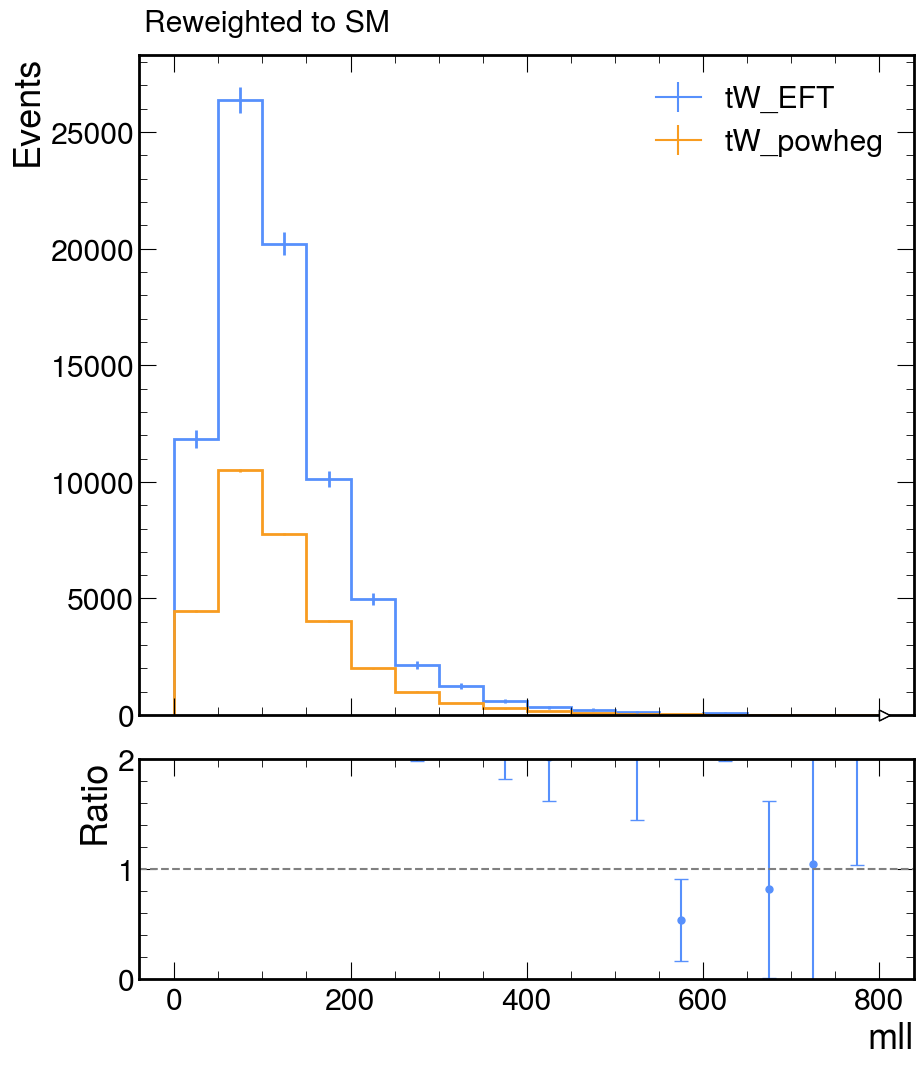

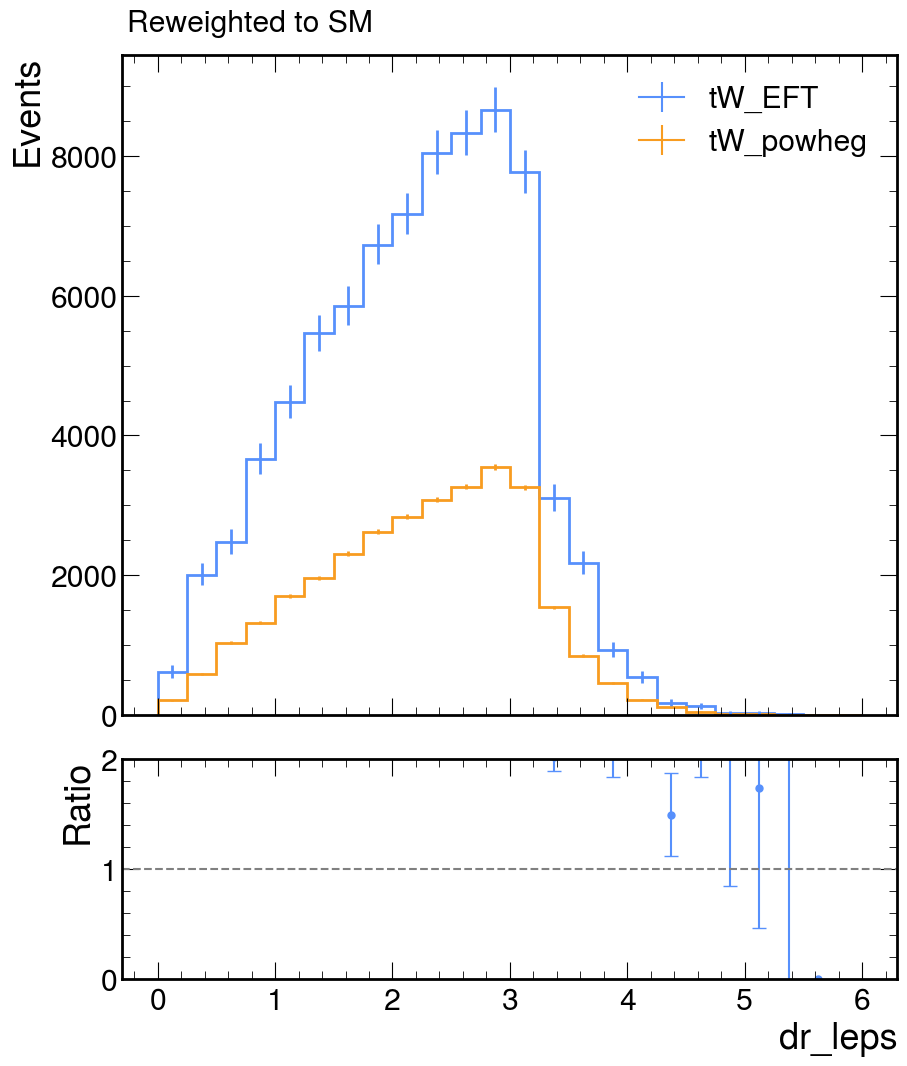

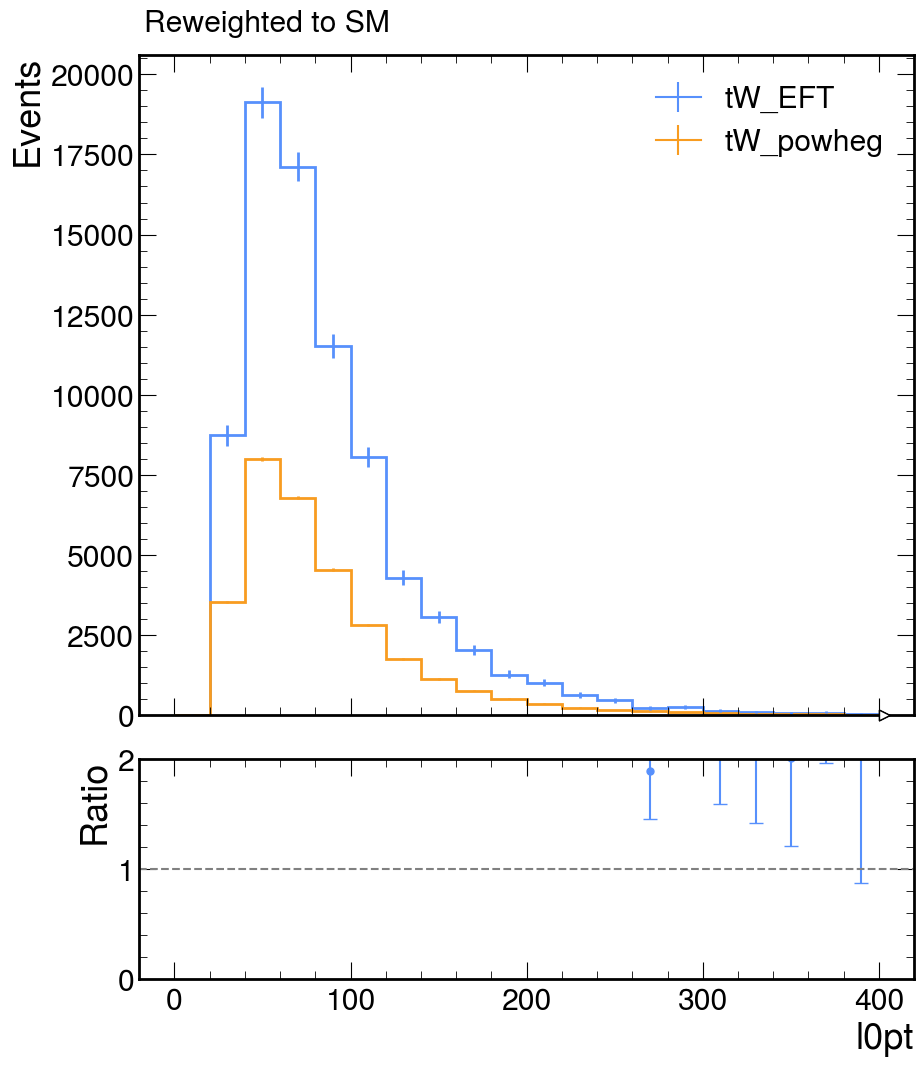

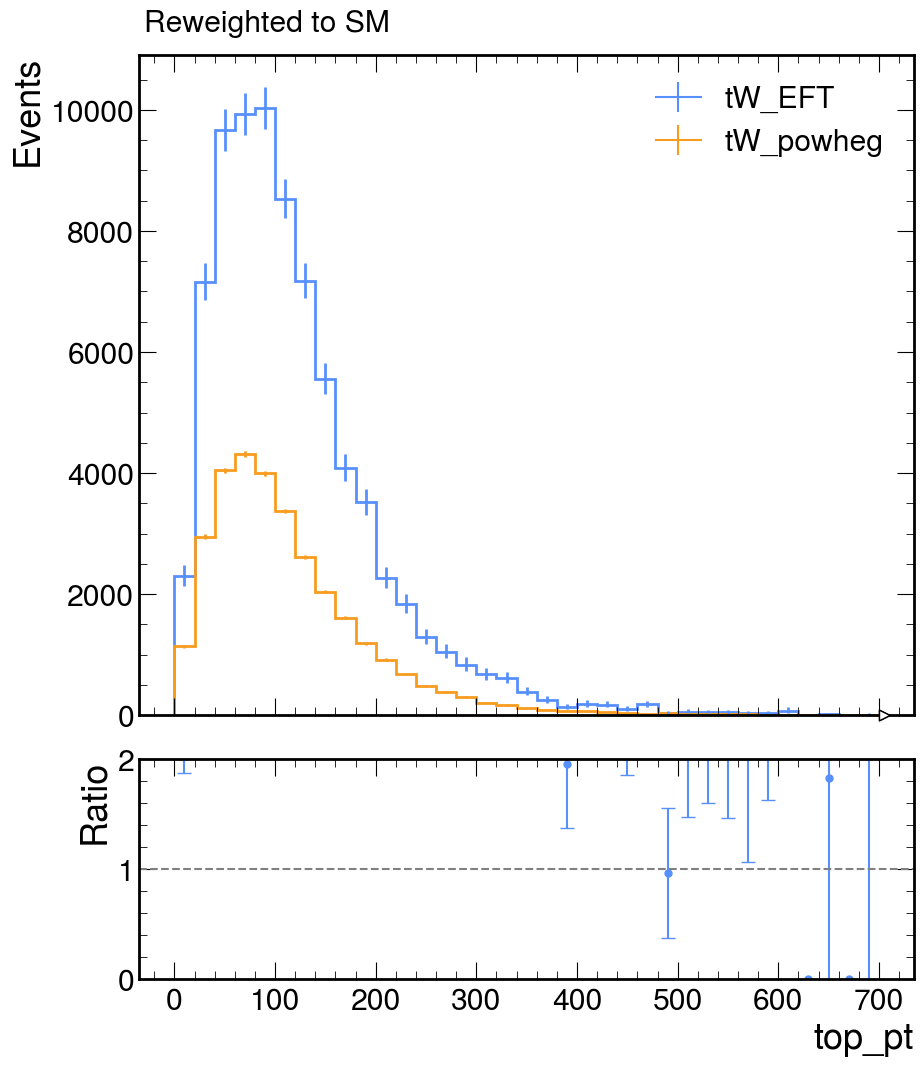

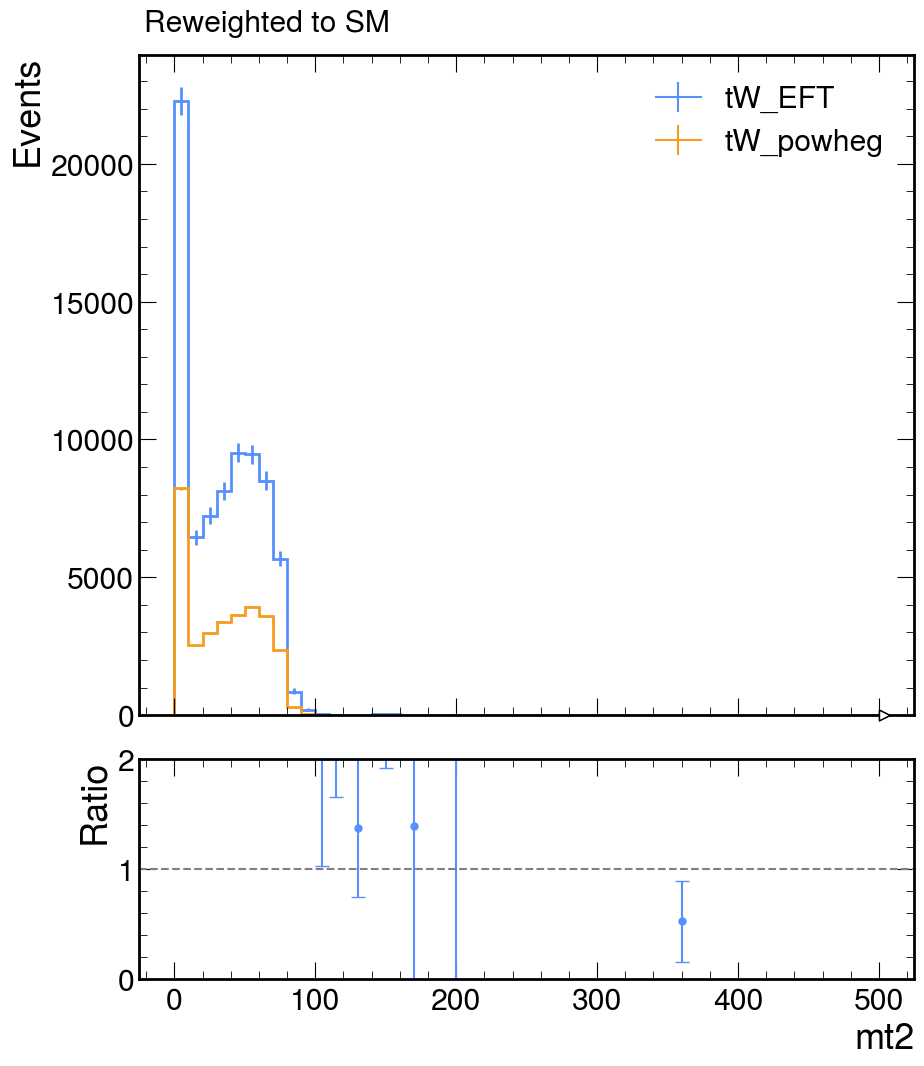

In [16]:
tWtop = utils.get_hist_from_pkl("../tWtop_powheg_hist.pkl.gz", allow_empty=False)
tWantitop = utils.get_hist_from_pkl("../tWantitop_powheg_hist.pkl.gz", allow_empty=False)
yukawa = utils.get_hist_from_pkl("../tW_yukawa_kin.pkl.gz", allow_empty=False)

# outpath = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April29/kinematics_ratios/"
for name in tWtop: 
    hpowheg = tWtop[name]+tWantitop[name]
    hEFT = yukawa[name]

    fig = make_plot_with_ratio(hEFT, hpowheg, "tW_EFT", "tW_powheg", name, "Reweighted to SM")
    # outname = os.path.join(outpath, f"{name}.png")    
    # fig.savefig(outname)
    # print(f'plot saved to {outname}')

In [218]:
# # making histograms reweighted to the starting point
# for name in hists1:
#     h_central = hists1[name]+hists2[name]+hists3[name]
#     h_nanogen = hists4[name]
#     fig = make_plot_with_ratio(h_central, h_nanogen, "central", "nanogen", name, "Reweighted to starting point")
#     figname = "2810_"+name+"_stpt.png"
#     # fig.savefig(figname)
#     # plt.close(fig)

# Kinematic Plots

In [3]:
new1_kin = utils.get_hist_from_pkl("../tW_new1_kin.pkl.gz", allow_empty=False)
new2_kin = utils.get_hist_from_pkl("../tW_new2_kin.pkl.gz", allow_empty=False)
powheg_kin = utils.get_hist_from_pkl("../tW_powheg_kin.pkl.gz", allow_empty=False)

new1_mt2 = utils.get_hist_from_pkl("../tW_new1_mt2.pkl.gz", allow_empty=False)

tWtop_powheg_kin = utils.get_hist_from_pkl("../tWtop_powheg_kin.pkl.gz", allow_empty=False)
tWantitop_powheg_kin = utils.get_hist_from_pkl("../tWantitop_powheg_kin.pkl.gz", allow_empty=False)

large_kin = utils.get_hist_from_pkl("../tW_large_kin.pkl.gz", allow_empty=False)
medium_kin = utils.get_hist_from_pkl("../tW_medium_kin.pkl.gz", allow_empty=False)

In [84]:
h1 = new1_kin['nevents'].as_hist({})
h1.values()

array([[26714.]])

Text(0, 1, 'Events/Bin')

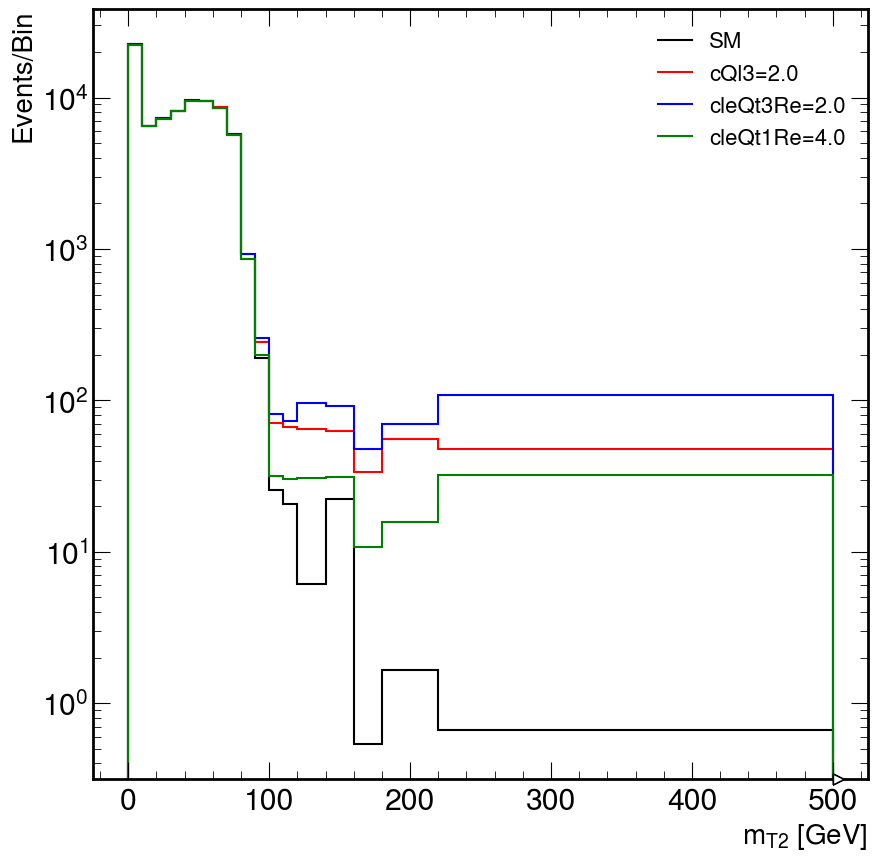

In [8]:
yukawa_histEFT=utils.get_hist_from_pkl("../tW_yukawa_histEFT.pkl.gz", allow_empty=False)
outpath = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April29/"

h1 = yukawa_histEFT['mt2'].as_hist({})

h2 = yukawa_histEFT['mt2'].as_hist({'cQl3':2.0})
h3 = yukawa_histEFT['mt2'].as_hist({'cleQt3Re':2.0})
h4 = yukawa_histEFT['mt2'].as_hist({'cleQt1Re':4.0})
# h2 = new1_kin['mt2'].as_hist({'cQl3':0.5})
# h3 = new1_kin['mt2'].as_hist({'cQl3':1.0})
# h4 = new1_kin['mt2'].as_hist({'cQl3':1.5})

# h1 = new1_mt2['mt2'].as_hist({})
fig, ax = plt.subplots()
h1.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="SM", color="black")
h2.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="cQl3=2.0", color="red")
h3.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="cleQt3Re=2.0", color="blue")
h4.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="cleQt1Re=4.0", color="green")

ax.legend(loc='upper right', fontsize=16)
ax.set_yscale('log')
ax.set_ylabel('Events/Bin')

# outname = os.path.join(outpath, f"mt2.png")    
# fig.savefig(outname)
# print(f'plot saved to {outname}')
# fig.show()

In [6]:
yukawa_histEFT=utils.get_hist_from_pkl("../tW_yukawa_histEFT.pkl.gz", allow_empty=False)
outpath = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April29/"

h1 = yukawa_histEFT['mt2'].as_hist({})
h2 = yukawa_histEFT['mt2'].as_hist({'cQl3':0.5})
h3 = yukawa_histEFT['mt2'].as_hist({'cleQt3Re':0.5})
h4 = yukawa_histEFT['mt2'].as_hist({'cleQt1Re':1.0})

val_SM = h1.values()[0]
ratio2 = h2.values()[0]/val_SM

bin_widths = (h1.axes[1].edges)
print(bin_widths)

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 140.
 160. 180. 220. 500.]


plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April29/mt2.png


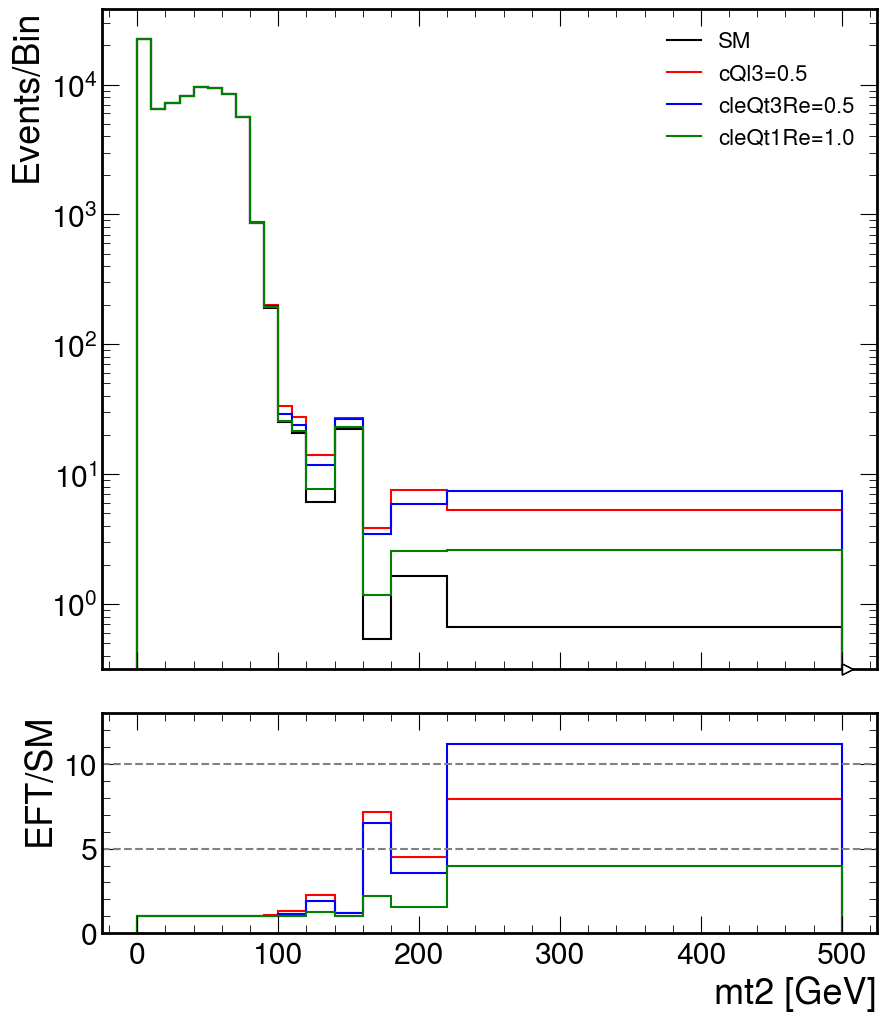

In [9]:
yukawa_histEFT=utils.get_hist_from_pkl("../tW_yukawa_histEFT.pkl.gz", allow_empty=False)
outpath = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April29/"

h1 = yukawa_histEFT['mt2'].as_hist({})
h2 = yukawa_histEFT['mt2'].as_hist({'cQl3':0.5})
h3 = yukawa_histEFT['mt2'].as_hist({'cleQt3Re':0.5})
h4 = yukawa_histEFT['mt2'].as_hist({'cleQt1Re':1.0})
# h2 = new1_kin['mt2'].as_hist({'cQl3':0.5})
# h3 = new1_kin['mt2'].as_hist({'cQl3':1.0})
# h4 = new1_kin['mt2'].as_hist({'cQl3':1.5})

val_SM = h1.values()[0]
ratioSM = h1.values()[0]/val_SM
ratio2 = h2.values()[0]/val_SM
ratio3 = h3.values()[0]/val_SM
ratio4 = h4.values()[0]/val_SM

# h1 = new1_mt2['mt2'].as_hist({})
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,12),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.1)

h1.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="SM", color="black")
h2.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="cQl3=0.5", color="red")
h3.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="cleQt3Re=0.5", color="blue")
h4.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="cleQt1Re=1.0", color="green")

# hep.histplot(ratioSM, bin_widths, ax=rax)
hep.histplot(ratio2, bin_widths, ax=rax, color="red")
hep.histplot(ratio3, bin_widths, ax=rax, color="blue")
hep.histplot(ratio4, bin_widths, ax=rax, color="green")

ax.legend(loc='upper right', fontsize=16)
ax.set_yscale('log')
ax.set_ylabel('Events/Bin', fontsize="medium")
ax.set_xlabel('')
rax.set_ylabel("EFT/SM", fontsize='medium')
rax.set_xlabel("mt2 [GeV]", fontsize="medium")
rax.set_ylim([0,13])
rax.axhline(y=5.0, color='gray', linestyle='--')
rax.axhline(y=10.0, color='gray', linestyle='--')

outname = os.path.join(outpath, f"mt2.png")    
fig.savefig(outname)
print(f'plot saved to {outname}')
# fig.show()

In [42]:
print(h1.values()[0][-1])
print(h2.values()[0][-1])
print(h3.values()[0][-1])
print(h4.values()[0][-1])

1.2836792065167303e-05
0.00010216381447082933
0.013088295935590607
0.0009637068980221554


plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/mt2_bad.png


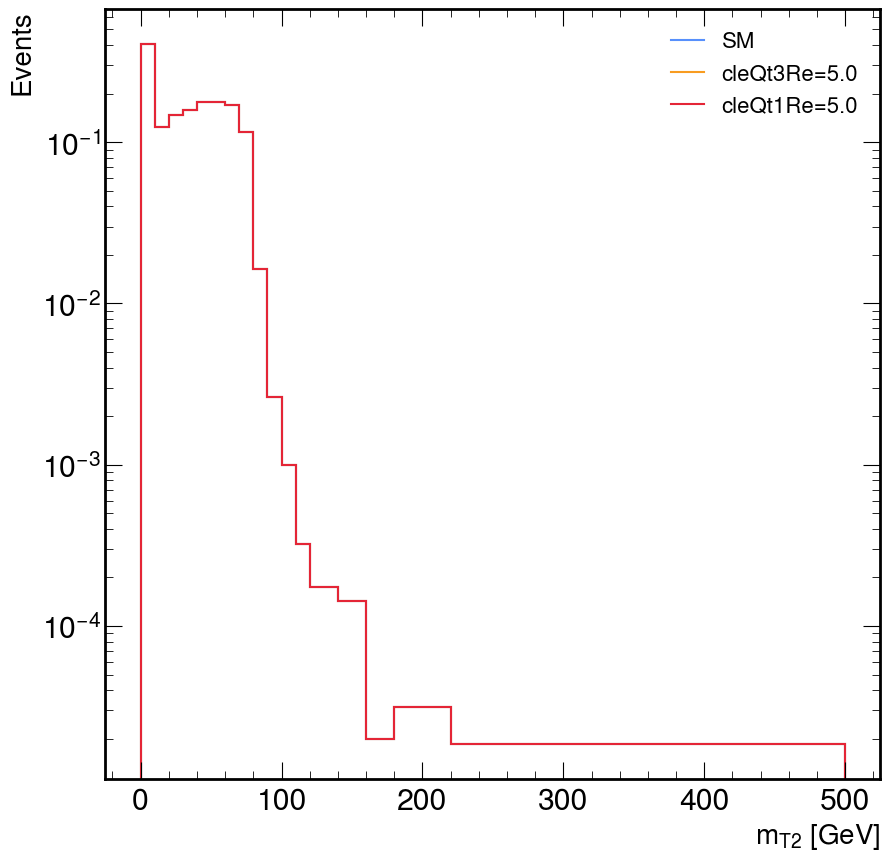

In [25]:
outpath = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/"

h1 = new1_kin['mt2'].as_hist({})
h2 = new1_kin['mt2'].as_hist({'cleQt3Re':5.0})
h3 = new1_kin['mt2'].as_hist({'cleQt1Re':5.0})

# h1 = new1_mt2['mt2'].as_hist({})
fig, ax = plt.subplots()
h1.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="SM")
h2.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="cleQt3Re=5.0")
h3.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="cleQt1Re=5.0")

ax.legend(loc='upper right', fontsize=16)
ax.set_yscale('log')
ax.set_ylabel('Events')

outname = os.path.join(outpath, f"mt2_bad.png")    
fig.savefig(outname)
print(f'plot saved to {outname}')
# fig.show()

1.2836792065167303e-05
0.00010216381447082933
0.013088295935590607
0.0009637068980221554


In [8]:
"""
Create a dictionary of histograms that are two existing histEFTs summed together bin-wise. 
The StrCategory axis is not saved. 
"""
powheg_SM_hists = {}

rwgt = {}
for name in tWtop_powheg_kin: 
    # save the 2 powheg histEFTs at the SM point
    h1 = tWtop_powheg_kin[name].as_hist(rwgt) 
    h2 = tWantitop_powheg_kin[name].as_hist(rwgt)
    # require the axes (regular axis) are identical between h1 and h2
    assert h1.axes[1] == h2.axes[1], f"Axes are different. h1.axes[1] = {h1.axes[1]}, h2.axes[2]={h2.axes[1]}"
    # save the axis from one of the histograms (from above, they are identical between the two) 
    ax1 = h1.axes[1]
    # save the bin values for each histogram
    val1 = h1.values()
    val2 = h2.values() 
    # add val1 and val2 together such that the result is the corresponding bins from h1 and h2 added 
    sum1 = np.sum([val1, val2], axis=0)
    # get the number of bins in the original historgam (different for different variables) 
    nbins = len(ax1.widths)

    # create new, empty histogram with the 
    h_temp = hist.Hist(ax1)
    h_temp[0:nbins]=sum1[0]

    powheg_SM_hists[name]=h_temp

In [16]:
# outpath = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/kinematics/"
# SM = {}
# for h in powheg_SM_hists:
#     h_new1 = new1_kin[h].as_hist(SM)
#     h_new2 = new2_kin[h].as_hist(SM)
#     h_powheg = powheg_SM_hists[h]
    
#     fig, ax = plt.subplots()

#     h_powheg.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="tW Powheg")
#     h_new1.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="tW EFT")
    
#     # h_powheg.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="tW Powheg", density=True)
#     # h_new1.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="tW EFT", density=True)
#     # h_new2.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="tW EFT2", density=True)
#     ax.legend(loc='upper right', fontsize=14)
#     plt.figtext(0.13, 0.89, "Reweighted to SM", fontsize=25)
#     # ax.set_xscale('log')
    
#     outname = os.path.join(outpath, f"{h}_SM.png")    
#     fig.savefig(outname)
#     print(f'plot saved to {outname}')

In [17]:
# outpath = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/kinematics_norm1/"
# SM = {}
# for h in powheg_SM_hists:
#     h_new1 = new1_kin[h].as_hist(SM)
#     h_new2 = new2_kin[h].as_hist(SM)
#     h_powheg = powheg_SM_hists[h]
    
#     fig, ax = plt.subplots()
    
#     h_powheg.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="tW Powheg", density=True)
#     h_new1.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="tW EFT", density=True)
#     ax.legend(loc='upper right', fontsize=14)
#     plt.figtext(0.13, 0.89, "Reweighted to SM", fontsize=25)
#     # ax.set_xscale('log')
    
#     outname = os.path.join(outpath, f"{h}_SM.png")    
#     fig.savefig(outname)
#     print(f'plot saved to {outname}')

In [18]:
# outpath = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/kinematics_norm1_log/"
# SM = {}
# for h in powheg_SM_hists:
#     h_new1 = new1_kin[h].as_hist(SM)
#     h_new2 = new2_kin[h].as_hist(SM)
#     h_powheg = powheg_SM_hists[h]
    
#     fig, ax = plt.subplots()
    
#     h_powheg.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="tW Powheg", density=True)
#     h_new1.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="tW EFT", density=True)
#     ax.legend(loc='upper right', fontsize=14)
#     plt.figtext(0.13, 0.89, "Reweighted to SM", fontsize=25)
#     ax.set_xscale('log')
    
#     outname = os.path.join(outpath, f"{h}_SM.png")    
#     fig.savefig(outname)
#     print(f'plot saved to {outname}')

In [19]:
# outpath = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/kinematics_rwgt_medium/"
# rwgt={'ctGIm':-0.5, 'ctGRe':-0.5, 'cHQ3':1.5, 'ctWRe':-1.5, 'cleQt3Re':10.0, 'cleQt1Re':18.0, 'cQl3':12.0, 'cbWRe':-6.0, 'cHtbRe':6.0}
# for h in powheg_SM_hists:
#     h_new1 = new1_kin[h].as_hist(rwgt)
#     h_medium = medium_kin[h].as_hist(rwgt)
#     fig, ax = plt.subplots()
    
#     h_new1.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="tW EFT", density=True)
#     h_medium.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="dedicated", density=True)
#     ax.legend(loc='upper right', fontsize=14)
#     plt.figtext(0.13, 0.89,  "Reweighted to the dedicated sample starting poing", fontsize=20)
#     # ax.set_xscale('log')
    
#     # outname = os.path.join(outpath, f"{h}_rwgt_medium.png")    
#     # fig.savefig(outname)
#     # print(f'plot saved to {outname}')

In [20]:
# outpath = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/kinematics_rwgt_large/"
# rwgt={'ctGIm':-1.5, 'ctGRe':-1.5, 'cHQ3':2.5, 'ctWRe':-2.5, 'cleQt3Re':15.0, 'cleQt1Re':20.0, 'cQl3':20.0, 'cbWRe':-10.0, 'cHtbRe':10.0}
# for h in powheg_SM_hists:
#     h_new1 = new1_kin[h].as_hist(rwgt)
#     h_large = large_kin[h].as_hist(rwgt)
    
#     fig, ax = plt.subplots()
    
#     h_new1.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="tW EFT", density=True)
#     h_large.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="dedicated", density=True)
#     ax.legend(loc='upper right', fontsize=14)
#     plt.figtext(0.13, 0.89, "Reweighted to the dedicated sample starting poing", fontsize=20)
#     # ax.set_xscale('log')
    
#     outname = os.path.join(outpath, f"{h}_rwgt_large.png")    
#     fig.savefig(outname)
#     print(f'plot saved to {outname}')

# 1D Quad EFT Parameterization Plots

# 1D Quad EFT Parameterization Plots

In [21]:
import plotting_tools_histEFT as plotTools
import os

In [16]:
standAlone = plotTools.read_MGstandalone_txt("/afs/crc.nd.edu/user/h/hnelson2/mc_production/standAloneMG/tW_new_MGxsec.txt")

In [17]:
# gridpack = plotTools.read_MGstandalone_txt("/afs/crc.nd.edu/user/h/hnelson2/mc_production/standAloneMG/tW_gridpack_xsec.txt")
gridpack = plotTools.read_MGstandalone_txt("/afs/crc.nd.edu/user/h/hnelson2/mc_production/standAloneMG/tW_gridpack_xsec_frozen.log")

In [22]:
def make_scatter_list_oneWC(scatter_dict, norm, norm_uncert):
	'''
	scatter_dict must be a single entry dictionary, with only the information for a single WC
	'''
	scatter_xvals = scatter_dict[0]
	scatter_yvals = np.divide(np.array(scatter_dict[1]), norm)
	scatter_sigma = np.array(scatter_dict[2])
	sigma_y = np.multiply(scatter_yvals, (np.sqrt(np.add(np.square(np.divide(scatter_sigma, scatter_dict[1])),np.square(np.divide(norm_uncert, norm))))))

	return [scatter_xvals, scatter_yvals, sigma_y]

In [23]:
def make_samples_dict(file, wc_name, sample_names=None, hist_name='sow_norm', wc_max=6.0):
	
    samples = {}

    # for fname in files: 
    #     if sample_names is not None:
    #         label = sample_names[fname]
    #     elif fname.endswith('.pkl.gz'):
    #         label = fname[:-7]
    #     else: 
    #         label = fname

    if wc_name == 'ctGRe' or wc_name == 'ctGIm':
        wc_range = np.arange(-1.5, 1.5, 0.2)
    else:
        wc_range = np.arange(-wc_max, wc_max+0.5, 0.5)
    h = plotTools.get_single_hist(file, hist_name)
    norm = h.as_hist({}).values()[0] #get SM xsec of the sample and use this for normalization
    weights = plotTools.calc_sow_array(h, wc_range, wc_name)

    if norm != 1.0:
        weights[1] = np.divide(weights[1], norm)

    # samples[label] = weights

    # return samples
    return weights

## Checking that my histEFT function returns the correct values for reweighted xsecs

In [58]:
small_sow_dict = make_samples_dict(file="../tW_small_sow.pkl.gz", wc_name='ctGRe', wc_max=1.0)
small_sow_hists = utils.get_hist_from_pkl("../tW_small_sow.pkl.gz", allow_empty=False)
sow_SM_xsec = small_sow_hists['sow_norm'].as_hist({}).values()[0]

In [59]:
h = small_sow_hists['sow_norm']
wc = 'ctGRe'
norm = 6.02563848
vals = []
for i in [-1.0, -0.7, -0.4, -0.2, 0.2, 0.4, 0.7, 1.0]:
    h_tmp = h.as_hist({wc:i})
    # print(f"ctGRe = {i} : xsec = {h_tmp.values()[0]/norm}")
    vals.append(h_tmp.values()[0]/norm)

In [60]:
standalone_dict = make_scatter_list_oneWC(standAlone[wc], 5.63, 0.01903)

Text(1, 0, 'ctGRe')

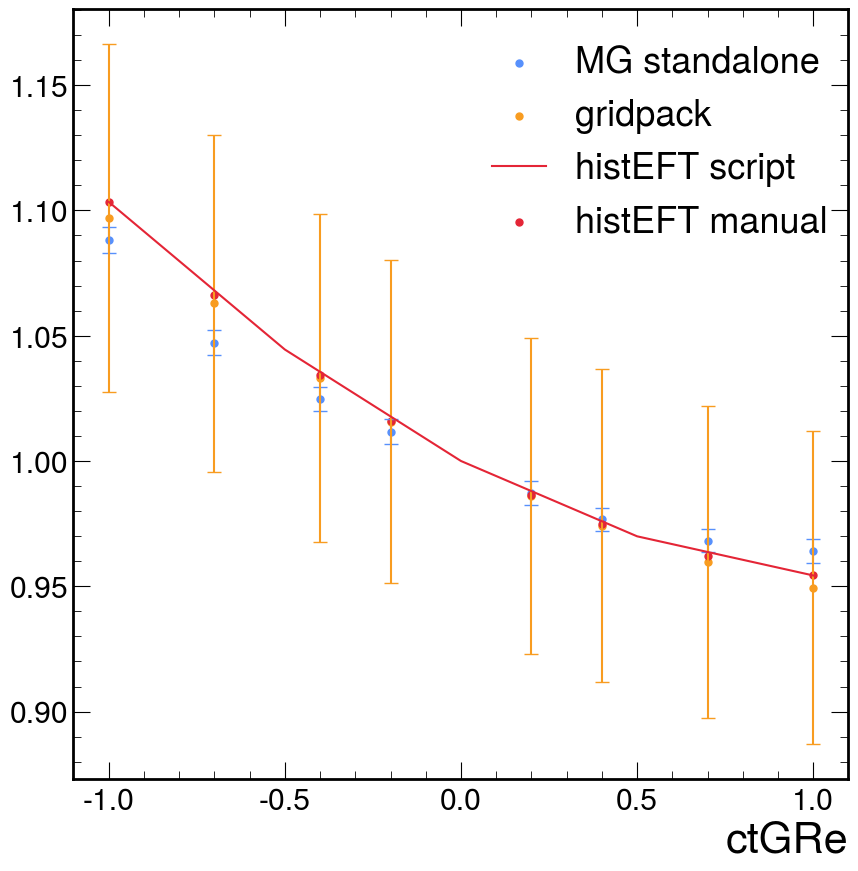

In [110]:
wc = 'ctGRe'

standalone_dict = make_scatter_list_oneWC(standAlone[wc], 5.63, 0.01903)
gridpack_dict = make_scatter_list_oneWC(gridpack[wc], 5.92199011614, 0.266680304541)

fig, ax = plt.subplots()
ax.scatter(standalone_dict[0], standalone_dict[1], label = "MG standalone")
ax.errorbar(standalone_dict[0], standalone_dict[1], yerr = standalone_dict[2], xerr = None, capsize=5, ls='none')
ax.scatter(gridpack_dict[0], gridpack_dict[1], label = "gridpack")
ax.errorbar(gridpack_dict[0], gridpack_dict[1], yerr = gridpack_dict[2], xerr = None, capsize=5, ls='none')

ax.plot(small_sow_dict[0], small_sow_dict[1], label="histEFT script")
ax.scatter([-1.0, -0.7, -0.4, -0.2, 0.2, 0.4, 0.7, 1.0], vals, label="histEFT manual")

ax.legend(loc='best', bbox_to_anchor=(1.02, 1.0), fontsize='medium')
ax.set_xlabel(wc, fontsize = 'large')

## Comparing calculated vs reweighted xsecs

In [20]:
orig = "../tW_orig_sow.pkl.gz"
small = "../tW_small_sow.pkl.gz"
medium = "../tW_medium_sow.pkl.gz"
large = "../tW_large_sow.pkl.gz"
# savedir = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/1d_quad_all/"

savedir = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/1d_quad_small/"
# savedir = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/1d_quad_large/"

new1="../tW_new1_sow.pkl.gz"
new2="../tW_new2_sow.pkl.gz"

In [21]:
savedir = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/1d_quad_large/"
for wc in standAlone.keys():
    new1_dict = make_samples_dict(file=new1, wc_name=wc, wc_max=10.0)
    new2_dict = make_samples_dict(file=new2, wc_name=wc, wc_max=10.0)
    # orig_dict = make_samples_dict(file=orig, wc_name=wc, wc_max=10.0)
    # small_dict = make_samples_dict(file=small, wc_name=wc, wc_max=10.0)
    # medium_dict = make_samples_dict(file=medium, wc_name=wc, wc_max=10.0)
    # large_dict = make_samples_dict(file=large, wc_name=wc, wc_max=10.0)
    
    standalone_dict = make_scatter_list_oneWC(standAlone[wc], 5.63, 0.01903)
    # gridpack_dict = make_scatter_list_oneWC(gridpack[wc], 5.92199011614, 0.266680304541)
    
    fig, ax = plt.subplots()
    ax.scatter(standalone_dict[0], standalone_dict[1], label = "MG standalone")
    ax.errorbar(standalone_dict[0], standalone_dict[1], yerr = standalone_dict[2], xerr = None, capsize=5, ls='none')
    # ax.scatter(gridpack_dict[0], gridpack_dict[1], label = "gridpack")
    # ax.errorbar(gridpack_dict[0], gridpack_dict[1], yerr = gridpack_dict[2], xerr = None, capsize=5, ls='none')

    # ax.plot(new1_dict[0], new1_dict[1], label="tW EFT")
    ax.plot(new2_dict[0], new2_dict[1], label="tW EFT")
    # ax.plot(orig_dict[0], orig_dict[1], label="tW_orig")
    # ax.plot(small_dict[0], small_dict[1], label="tW_small")
    # ax.plot(medium_dict[0], medium_dict[1], label="tW_medium")
    # ax.plot(large_dict[0], large_dict[1], label="tW_large")

    ax.legend(loc='best', fontsize='medium') #bbox_to_anchor=(1.02, 0.5),
    ax.set_xlabel(wc, fontsize = 'large')
    ax.set_ylabel(r"$\sigma_{SMEFT} /\ \sigma_{SM}$", fontsize='large')
    # ax.set_xlim([-6.0, 6.0])
    fig.show()
    
    figname = f"quad1d_{wc}.png"
    fig.savefig(os.path.join(savedir,figname)) #bbox_inches='tight'
    print(f"saving plot to {os.path.join(savedir, figname)}")
    plt.close(fig)

/tmp/ipykernel_381611/1024119607.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/1d_quad_large/quad1d_ctGIm.png
saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/1d_quad_large/quad1d_ctGRe.png
saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/1d_quad_large/quad1d_cHQ3.png
saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/1d_quad_large/quad1d_ctWRe.png
saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/1d_quad_large/quad1d_cleQt3Re.png
saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/1d_quad_large/quad1d_cleQt1Re.png
saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/1d_quad_large/quad1d_cQl3.png
saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/1d_quad_large/quad1d_cbWRe.png
saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/1d_quad_large/quad1d_cHtbRe.png


In [22]:
savedir = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/1d_quad_small/"
for wc in standAlone.keys():
    new1_dict = make_samples_dict(file=new1, wc_name=wc, wc_max=6.0)
    new2_dict = make_samples_dict(file=new2, wc_name=wc, wc_max=6.0)
    # orig_dict = make_samples_dict(file=orig, wc_name=wc, wc_max=10.0)
    # small_dict = make_samples_dict(file=small, wc_name=wc, wc_max=10.0)
    # medium_dict = make_samples_dict(file=medium, wc_name=wc, wc_max=10.0)
    # large_dict = make_samples_dict(file=large, wc_name=wc, wc_max=10.0)
    
    standalone_dict = make_scatter_list_oneWC(standAlone[wc], 5.63, 0.01903)
    # gridpack_dict = make_scatter_list_oneWC(gridpack[wc], 5.92199011614, 0.266680304541)
    
    fig, ax = plt.subplots()
    ax.scatter(standalone_dict[0], standalone_dict[1], label = "MG standalone")
    ax.errorbar(standalone_dict[0], standalone_dict[1], yerr = standalone_dict[2], xerr = None, capsize=5, ls='none')
    # ax.scatter(gridpack_dict[0], gridpack_dict[1], label = "gridpack")
    # ax.errorbar(gridpack_dict[0], gridpack_dict[1], yerr = gridpack_dict[2], xerr = None, capsize=5, ls='none')

    # ax.plot(new1_dict[0], new1_dict[1], label="tW EFT")
    ax.plot(new2_dict[0], new2_dict[1], label="tW EFT")
    # ax.plot(orig_dict[0], orig_dict[1], label="tW_orig")
    # ax.plot(small_dict[0], small_dict[1], label="tW_small")
    # ax.plot(medium_dict[0], medium_dict[1], label="tW_medium")
    # ax.plot(large_dict[0], large_dict[1], label="tW_large")

    ax.legend(loc='best', fontsize='medium') #bbox_to_anchor=(1.02, 0.5),
    ax.set_xlabel(wc, fontsize = 'large')
    ax.set_ylabel(r"$\sigma_{SMEFT} /\ \sigma_{SM}$", fontsize='large')
    ax.set_xlim([-6.0, 6.0])
    fig.show()
    
    figname = f"quad1d_{wc}.png"
    fig.savefig(os.path.join(savedir,figname)) #bbox_inches='tight'
    print(f"saving plot to {os.path.join(savedir, figname)}")
    plt.close(fig)

/tmp/ipykernel_381611/650829207.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/1d_quad_small/quad1d_ctGIm.png
saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/1d_quad_small/quad1d_ctGRe.png
saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/1d_quad_small/quad1d_cHQ3.png
saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/1d_quad_small/quad1d_ctWRe.png
saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/1d_quad_small/quad1d_cleQt3Re.png
saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/1d_quad_small/quad1d_cleQt1Re.png
saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/1d_quad_small/quad1d_cQl3.png
saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/1d_quad_small/quad1d_cbWRe.png
saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/1d_quad_small/quad1d_cHtbRe.png


In [23]:
savedir = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/1d_quad_small/"
wclst = ['ctGRe', 'ctGIm']
for wc in wclst:
# for wc in standAlone.keys():
    new1_dict = make_samples_dict(file=new1, wc_name=wc, wc_max=10.0)
    new2_dict = make_samples_dict(file=new2, wc_name=wc, wc_max=10.0)
    # orig_dict = make_samples_dict(file=orig, wc_name=wc, wc_max=10.0)
    # small_dict = make_samples_dict(file=small, wc_name=wc, wc_max=10.0)
    # medium_dict = make_samples_dict(file=medium, wc_name=wc, wc_max=10.0)
    # large_dict = make_samples_dict(file=large, wc_name=wc, wc_max=10.0)
    
    standalone_dict = make_scatter_list_oneWC(standAlone[wc], 5.63, 0.01903)
    # gridpack_dict = make_scatter_list_oneWC(gridpack[wc], 5.92199011614, 0.266680304541)
    
    fig, ax = plt.subplots()
    ax.scatter(standalone_dict[0], standalone_dict[1], label = "MG standalone")
    ax.errorbar(standalone_dict[0], standalone_dict[1], yerr = standalone_dict[2], xerr = None, capsize=5, ls='none')
    # ax.scatter(gridpack_dict[0], gridpack_dict[1], label = "gridpack")
    # ax.errorbar(gridpack_dict[0], gridpack_dict[1], yerr = gridpack_dict[2], xerr = None, capsize=5, ls='none')

    # ax.plot(new1_dict[0], new1_dict[1], label="tW EFT")
    ax.plot(new2_dict[0], new2_dict[1], label="tW EFT")
    # ax.plot(orig_dict[0], orig_dict[1], label="tW_orig")
    # ax.plot(small_dict[0], small_dict[1], label="tW_small")
    # ax.plot(medium_dict[0], medium_dict[1], label="tW_medium")
    # ax.plot(large_dict[0], large_dict[1], label="tW_large")

    ax.legend(loc='best', fontsize='medium') #bbox_to_anchor=(1.02, 0.5),
    ax.set_xlabel(wc, fontsize = 'large')
    ax.set_ylabel(r"$\sigma_{SMEFT} /\ \sigma_{SM}$", fontsize='large')
    # ax.set_xlim([-6.0, 6.0])
    fig.show()
    
    figname = f"quad1d_{wc}.png"
    fig.savefig(os.path.join(savedir,figname)) #bbox_inches='tight'
    print(f"saving plot to {os.path.join(savedir, figname)}")
    plt.close(fig)

/tmp/ipykernel_381611/2096788875.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/1d_quad_small/quad1d_ctGRe.png
saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April17/1d_quad_small/quad1d_ctGIm.png


# Quad Plots April 29

In [26]:
#SM = 5.445 +- 0.02162 pb
standAlone = plotTools.read_MGstandalone_txt("/afs/crc.nd.edu/user/h/hnelson2/mc_production/standAloneMG/tW_yukawa_all.txt")
yukawa_sow = medium = "../tW_yukawa_sow.pkl.gz"

In [31]:
savedir = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April29/1d_quad/"

for wc in standAlone.keys():
    yukawa_dict = make_samples_dict(file=yukawa_sow, wc_name=wc, wc_max=10.0)
    
    standalone_dict = make_scatter_list_oneWC(standAlone[wc], 5.445, 0.02162)
    
    fig, ax = plt.subplots()
    ax.scatter(standalone_dict[0], standalone_dict[1], label = "MG standalone")
    ax.errorbar(standalone_dict[0], standalone_dict[1], yerr = standalone_dict[2], xerr = None, capsize=5, ls='none')

    ax.plot(yukawa_dict[0], yukawa_dict[1], label="tW EFT")

    ax.legend(loc='best', fontsize='medium') #bbox_to_anchor=(1.02, 0.5),
    ax.set_xlabel(wc, fontsize = 'large')
    ax.set_ylabel(r"$\sigma_{SMEFT} /\ \sigma_{SM}$", fontsize='large')
    fig.show()
    
    figname = f"quad1d_{wc}.png"
    fig.savefig(os.path.join(savedir,figname)) #bbox_inches='tight'
    print(f"saving plot to {os.path.join(savedir, figname)}")
    plt.close(fig)

/tmp/ipykernel_526900/1528683113.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April29/1d_quad/quad1d_ctGIm.png
saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April29/1d_quad/quad1d_ctGRe.png
saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April29/1d_quad/quad1d_cHQ3.png
saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April29/1d_quad/quad1d_ctWRe.png
saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April29/1d_quad/quad1d_cleQt3Re.png
saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April29/1d_quad/quad1d_cleQt1Re.png
saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April29/1d_quad/quad1d_cQl3.png
saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April29/1d_quad/quad1d_cbWRe.png
saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April29/1d_quad/quad1d_cHtbRe.png


In [33]:
savedir = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April29/1d_quad/"

plot_list = ['cleQt1Re']
for wc in plot_list:
    yukawa_dict = make_samples_dict(file=yukawa_sow, wc_name=wc, wc_max=20.0)
    
    standalone_dict = make_scatter_list_oneWC(standAlone[wc], 5.445, 0.02162)
    
    fig, ax = plt.subplots()
    ax.scatter(standalone_dict[0], standalone_dict[1], label = "MG standalone")
    ax.errorbar(standalone_dict[0], standalone_dict[1], yerr = standalone_dict[2], xerr = None, capsize=5, ls='none')

    ax.plot(yukawa_dict[0], yukawa_dict[1], label="tW EFT")

    ax.legend(loc='best', fontsize='medium') #bbox_to_anchor=(1.02, 0.5),
    ax.set_xlabel(wc, fontsize = 'large')
    ax.set_ylabel(r"$\sigma_{SMEFT} /\ \sigma_{SM}$", fontsize='large')
    fig.show()
    
    figname = f"quad1d_{wc}.png"
    fig.savefig(os.path.join(savedir,figname)) #bbox_inches='tight'
    print(f"saving plot to {os.path.join(savedir, figname)}")
    plt.close(fig)

saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/April29/1d_quad/quad1d_cleQt1Re.png


/tmp/ipykernel_526900/3773776056.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
